**Problem Statement** : This data set contains details of a Bank's customers and the target variable is a binary variable reflects on the fact whether the customer left the bank(closed his account) or he continues to be a customer.

In simple words, here I would **Predict whether the customer had left the organization or not.**

In the first portion, I have focused on implementing **a basic neural network model** rather than concentrating on improving accuracy results. 

**Workflow**



1.   Import Necessary Libraries
2.   Load the dataset
3.   Drop the unecessary columns
4.   Check Null values and Missing values/NaN values
5.   Use LabelEncoder to convert the Categorical data into Numerical data
6.   Feature Selection and Data Splitting
7.   Create Deep Learning Model : 
     - 5 Steps to follow: 
           1. Define the model architecture
           2. Compile the model
           3. Fit the model
           4. Evaluate the model
           5. Make Predictions

Here I have implemented the model **MLP** for **Binary Classification**


In a Multilayer Perceptron model, the neural network is fully connected and comprised of layers of nodes where each node is connected to all the outputs from the previous layers and the output of each node is connected to all inputs for each of the nodes into the next layers. 

**importing tensorflow and necessary libraries**

In [ ]:
import tensorflow as tf 
from numpy import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
tf.__version__ #checking the version

'2.5.0'

In [ ]:
from google.colab import files  
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


**Load the Dataset**

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")  
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.columns.tolist()  #column list

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

**dropping unnecessary columns for prediction**

In [ ]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) 
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**checking null values**

In [ ]:
df.isnull().sum() 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**checking NaN values**

In [ ]:
df.isna().sum() 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Checking the number of records and data type of the columns**

In [ ]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Now, it is needed to convert the object type, categorical data to numerical data format.

**Using Label Encoder to convert Categorical data to Numeric data**

In [ ]:
#label_encoder = preprocessing.LabelEncoder()     
#df['gender']= label_encoder.fit_transform(df['gender'])
#df['geography']= label_encoder.fit_transform(df['geography'])

In [ ]:
#Label Encoding for object type data
datatypes_dict = dict(df.dtypes)
#keep track for mapping columns to labelencoder
LabelEncoderCollection = {}
for col_name, data_type in datatypes_dict.items():
  if data_type=='object':
    LE = LabelEncoder()
    df[col_name] = LE.fit_transform(df[col_name])
    LabelEncoderCollection[col_name] = LE  


In [ ]:
df.info()  #all the data is in numeric form now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


**Feature Selection and Data Splitting**

In [ ]:
# split into input and output columns
X = df.values[:, :-1].astype('float32') #all the independent features
y = df.values[:, -1].astype(int)  #splitted the target column, the dependent feature from the data

In [ ]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


**Creating Deep Learning Model**

**Step 1 : Define the model**

* In this step, the type of model building structure of the Deep Learning architecture can be decided and there are three steps- the Sequential Models, Functional API, or a custom architecture defined by the user.

* Depending on the problem, there are several architectures can be used such as, CNN or ConvNets are used for computer vision tasks, then for natural language processing problems, RNN and LSTMs are preferable arvhitrctures. 

* here we need to define the layers of the model, each layer will be configured with a number of nodes and activation function, and connecting the layers together.

In [ ]:
#start model with sequential object
model = tf.keras.models.Sequential()
#add in your input object and specify the dimensions that you want to pass in
model.add(tf.keras.Input(shape=(10,))) #input layer shape=10, because the number of columns in final features are 10
#Dense layers means the hidden layers
model.add(tf.keras.layers.Dense(32))   #add the 1st layer in your neuron
model.add(tf.keras.layers.Dense(32))   # the 2nd layer is 32 to increase complexities
#as our problem statement is yes/no decision, Sigmoid activation function should be used here
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #final sigmoid layer to predict(0/1)
#here is another Dense layer with one neuron that defines the final output layer. 

#print model summary to understand neural network flow, that checks the model details with parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


**step 2 : Compile the model**

* In this step, model.compile() function is used to compile the model.
* It is required to configure the model for successful fitting or training process. 
* For the model evaluation procedure, some critical components of the training procedure is defined. Some necessary parameters need to be assigned in the following step such as, the loss, optimizers and the metrics. 
* The model would be compiled though the optimizers, it is necessary to select the loss functions, optimization procedure(for example, stochastic gradient descent) or modern variations such as Adam, RMSprop, Adagrad or similar optimizers for computations can be used. The performance metrics are usually the accuracy or any user defined metrics for analysis to keep track during model training process.
* The optimizer can be specified as a string or instance can be created for a optimizer class. for example, 'sgd' for stochastic gradient descent.

* Usually these three loss functions are used - 
            1.For binary classification : 'binary_crossentropy'
            2.For multi-class classification : 'sparse_categorical_crossentropy'
            3.For regression : 'mse' (mean squared error)

In [ ]:
#created optimizer and compile the model
#Optimizer Adam has been used with learning rate

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"] )


**Step 3: Fit the model**

The third logical step is to fitting the model on the training dataset       (model.fit()). The fit funciton trains the model for a fixed number of epochs. The term epochs means the iteration on  a dataset.

* the important parameters such as the number of epochs, input and output data, validation data, the batch size (the number of samples in an epoch that estimates model error) for computing and calculating the essential features. 

*  a progress bar shows the summary status of each epoch and the overall training process. Moreover, model performance can be simplified using the parameter 'verbose', when the value is 2. If verbose is set 0, then training will turn off.  


In [ ]:
# fit the model / training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)  

#saves all the model metric performances while training, we can see the loss and accuracy of training and validation sets getting printed.

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 1105.3628 - accuracy: 0.6526 - val_loss: 157.3726 - val_accuracy: 0.8020
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 321.2197 - accuracy: 0.6670 - val_loss: 178.6630 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 284.8024 - accuracy: 0.6729 - val_loss: 274.5398 - val_accuracy: 0.8020
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 250.8241 - accuracy: 0.6814 - val_loss: 151.3423 - val_accuracy: 0.3820
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 290.0356 - accuracy: 0.6801 - val_loss: 252.2607 - val_accuracy: 0.7115
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 247.0703 - accuracy: 0.6731 - val_loss: 188.0297 - val_accuracy: 0.7955
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 285.0220 - accuracy: 0.6685 - val_loss: 291.8254 

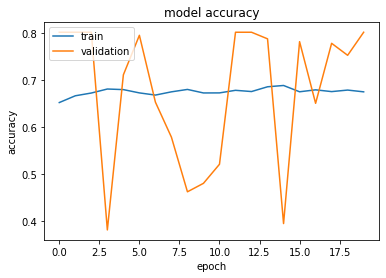

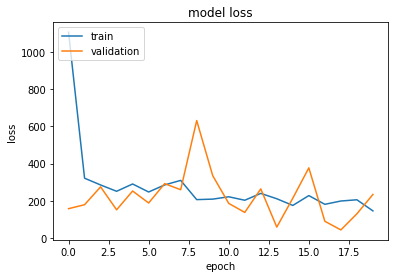

In [ ]:
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



Here, model learning is unstable as there are a lot of fluctutaions in Accuracy Graph. The training accuracy is constant and the validation accurcay is highly fluctuating.

A well-trained model would have training and validation accuracy going to gradually as epochs progress. The loss graph seems okay as they are decreasing gradually.

**Step 4: Evaluate the model**

* After training model evaluation (model.evaluate()) is done on the test dataset. The amount of data that is being used for prediction, has an impact on evaluation performance. The speed of model evaluation is proportional to the amount of your trained data. This is called the holdout category for model training. 

**Step 5: Make Predictions**

* Apart from the trained dataset, the model's effectiveness is measured based on the prediction results on a random untrained datasets. Here simply calling the function (model.predict()) is used to predict ht e class label, probability or numerical values.  
*  Moreover, model evaluation metrics can be used such as - Classification Accuracy, Confusion matrix, Logarithmic Loss, Area under curve (AUC), F-Measure etc.

In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.802


In [ ]:
#collect predictions
predictions = np.round(model.predict(X_test))
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
#check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.802

In [ ]:
confusion_matrix(y_test, predictions)

array([[1604,    0],
       [ 396,    0]])


Here model keeps predicting everything to be zero that is a common problem with imbalanced datasets where one class is very dominant over another class.

Now, I would be working on **improving the accuracy** using **Dropout** and **Batch Normalization**.




**Improvement of Neural Network Model** 





Steps to improve Accuracy results in Neural Network:

*  Add class weights to handle imbalance
*  Increase the number of units and number of layers in Dense layers 
*  Add Batch Normalization to layers
*  Add Dropout after every Layers
 (this helps the individual neurons to learn more from graidents that are being backpropagated)

In [ ]:
#Adding class weights to handle imbalance

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y = y_train)

model_class_weights = {}
for e, weight in enumerate(class_weights):
  model_class_weights[e] = weight

model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [ ]:
#Increase the number of units and number of layers in Dense layers
#Add Batch Normalization to layers
#Add Dropout after every input Layers



model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,))) 

model.add(tf.keras.layers.BatchNormalization()) #adding batchnormalization before every layers
model.add(tf.keras.layers.Dense(128, activation='relu'))   # value of neurons has been changed from 32 to 128, 64 respectively
model.add(tf.keras.layers.Dropout(0.02))  #deactivating 20% of neurons

model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.02))

model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dense(32, activation='relu')) #before the final output layer, a dense layer with 32 neurons has been added. 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

Now the model has significantly higher parameters to train compared to the previous model.

In [ ]:
#complie the model 

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"] )

In [ ]:
# fit the model / training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)  

Epoch 1/20
250/250 - 1s - loss: 0.4300 - accuracy: 0.8105 - val_loss: 0.3801 - val_accuracy: 0.8455
Epoch 2/20
250/250 - 0s - loss: 0.3761 - accuracy: 0.8410 - val_loss: 0.3393 - val_accuracy: 0.8595
Epoch 3/20
250/250 - 0s - loss: 0.3598 - accuracy: 0.8481 - val_loss: 0.3363 - val_accuracy: 0.8625
Epoch 4/20
250/250 - 0s - loss: 0.3557 - accuracy: 0.8451 - val_loss: 0.3317 - val_accuracy: 0.8660
Epoch 5/20
250/250 - 0s - loss: 0.3522 - accuracy: 0.8515 - val_loss: 0.3258 - val_accuracy: 0.8670
Epoch 6/20
250/250 - 0s - loss: 0.3481 - accuracy: 0.8469 - val_loss: 0.3370 - val_accuracy: 0.8610
Epoch 7/20
250/250 - 1s - loss: 0.3472 - accuracy: 0.8544 - val_loss: 0.3284 - val_accuracy: 0.8695
Epoch 8/20
250/250 - 0s - loss: 0.3488 - accuracy: 0.8515 - val_loss: 0.3303 - val_accuracy: 0.8615
Epoch 9/20
250/250 - 0s - loss: 0.3469 - accuracy: 0.8522 - val_loss: 0.3298 - val_accuracy: 0.8600
Epoch 10/20
250/250 - 0s - loss: 0.3428 - accuracy: 0.8595 - val_loss: 0.3253 - val_accuracy: 0.8660

Now it takes less time for training compared to the previous model as there are more number of parameters. 

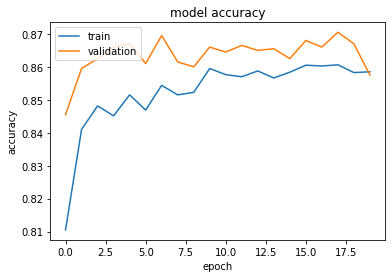

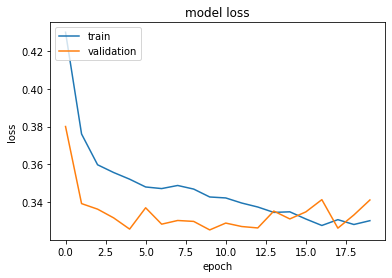

In [ ]:
#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Both the training and validation accuracies are gradually increasing now. 
and the loss kept decreasing with the number of epochs.
This means that now the model has trained in quite well manner.



In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


Test Accuracy: 0.858


In [ ]:
#collect predictions
predictions = np.round(model.predict(X_test))

In [ ]:
#checking the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.8575

In [ ]:
confusion_matrix(y_test, predictions)

array([[1504,  100],
       [ 185,  211]])

The accuracy has increased a bit and through the confusion matrix, better prediction results are observed here than previous. 

In [ ]:
from sklearn.metrics import classification_report         
#The classification report visualizer displays the precision, recall, F1, and support scores for the model.

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1604
           1       0.68      0.53      0.60       396

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

